Visualizacion de Datos
Alejandro Torre A00828064

In [1]:
## Empece importando las librerias que tengo que utilizar para el desarrollo de mi reto

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Quise confirmar que mi base de datos que importe estaba en el mismo path que estaba trabajando.

In [4]:
%ls

 07_02_pie_box_scatter_bubble.ipynb   requirements.txt
 Canada.xlsx                         'Reto Entregable 1.ipynb'
 datasets/                           'Reto Entregable 1.ipynb copy'
 heart.csv                           'RETO NUEVO.ipynb'
 movie_metadata.csv                   runtime.txt
 nhanes_2015_2016.csv                 session_01/
 README.md                            welcome_binder.ipynb
 requierementsEXL


In [5]:
#Para poder abrir la base de datos tengo que utilizar panda para abrirlo dentro de un dataframe

In [6]:
df = pd.read_csv("heart.csv")

In [7]:
#Ya al asignar que tu dataframe sea tu base de datos abri el dataframe que me muestra los datos

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
#Note que en mi dataframe habian columnas que no influyen el analisis que voy a realizar por ende lo borre

In [10]:
df = pd.read_csv("heart.csv")

df.drop("FastingBS",
        axis=1,inplace=True,)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,Normal,122,N,0.0,Up,0


La variable de interes de mi base de datos es "HearDisease" lo cual el valor numerico de 1 o 0 indica si padecen de una enfermedad del corazon. Esta base de datos agarro a 918 personas buscando identificar la causa de un ataque o una enfermedad relacionada con el corazon. Mi proposito con esta base de datos es descubrir la importancia de las variables "Cholesterol", "Sex", "Age", "Resting BP" y "ExerciseAngina" y como cada una impacta "HeartDisease".

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   RestingECG      918 non-null    object 
 6   MaxHR           918 non-null    int64  
 7   ExerciseAngina  918 non-null    object 
 8   Oldpeak         918 non-null    float64
 9   ST_Slope        918 non-null    object 
 10  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 79.0+ KB


Esta funcion nos permite identificar el tipo de dato de cada columna presente en la base de datos. Esto es importante considerando que voy a buscar una relacion y generar graficas de esta base de datos. El proposito es identificar si la variable es numerica y de que tipo.

In [12]:
df.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


Esta funcion me describe la media, la desviacion estandar, el valor minimo y maximo entre otras cosas. Me permite ubicar mejor como se comportan los datos que voy a estar utilizando y que variables voy a poder utilizar.  

Text(0.5, 1.0, 'Edad')

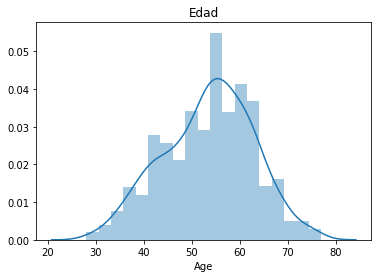

In [31]:
sns.distplot(df.Age)
plt.title('Edad')

Utilize un histograma para observar las edades del grupo de personas que tomaron en cuenta para esta base de datos ya que definitivamente la edad juega un rol en las enfermedades del corazon. Es mas comun que a una edad mas grande padescan de esta enfermedad a que una edad temprana. 

Text(0.5, 1.0, 'Cholesterol')

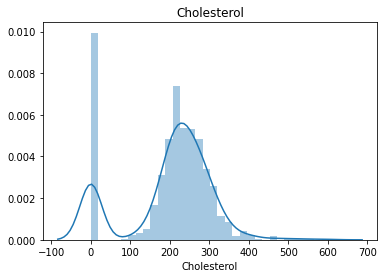

In [32]:
sns.distplot(df.Cholesterol)
plt.title('Cholesterol')

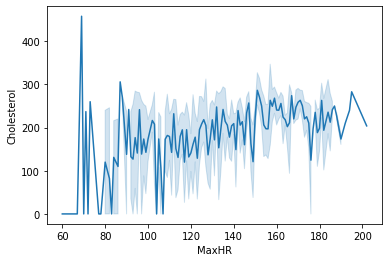

In [21]:
sns.lineplot(x="MaxHR", y="Cholesterol", data=df)

En esta grafica logro observar la relacion entre la maxima velocidad de los latidos del corazon contra el cholesterol de esa persona indicada. Observo una tendencia creciente en esta grafica ya que esta comprobado que una persona con latidos acelerados se encuentra con mas riesgo a padecer de una enfermedad del corazon y una persona con mas riesgo de una enferemedad esta relacionado con un alto nivel de cholesterol. Identifico uno que otros datos que podrian ser identificados como atipicos pero en esencia la grafica esta correcta. 

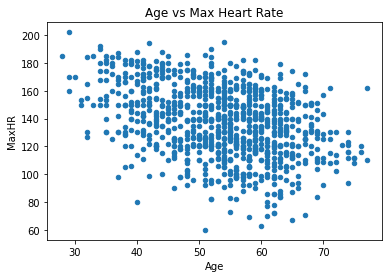

In [33]:
df.plot(kind="scatter",
x="Age",
y="MaxHR")
plt.title('Age vs Max Heart Rate') 
plt.show()

Usando una grafica de dispersion queria comparar la edad de las persona

REGRESION

In [48]:
pip install statsmodels

     |████████████████████████████████| 9.9 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 81.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [49]:
import statsmodels.api as sm
model = sm.OLS.from_formula('HeartDisease~Age',
                            data=df)
result = model.fit() 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     79.16
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           3.01e-18
Time:                        15:47:39   Log-Likelihood:                -622.97
No. Observations:                 918   AIC:                             1250.
Df Residuals:                     916   BIC:                             1260.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2425      0.091     -2.670      0.008      -0.421      -0.064
Age            0.0149      0.002      8.897      0.000       0.012       0.018
==============================================================================
Omnibus:                     4955.631   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.130
Skew:                          -0.204   Prob(JB):                     3.31e-24
Kurtosis:                       1.369   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""